### Upload and plot data:

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm #for AIC and BIC
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from scipy.signal import periodogram #seasonality


In [141]:
data = pd.read_csv("gold.csv",index_col="Date")
data.index = pd.to_datetime(data.index)
data = data.sort_index()
data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2013-01-02,"1,689.90","1,675.80","1,695.00","1,672.10",0.06K,0.78%
2013-01-03,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%
2013-01-04,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2013-01-07,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2013-01-08,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%


In [142]:
data = data.drop(["Open","High","Low","Vol.","Change %"],axis=1)
data["Price"] = data["Price"].str.replace(',', '')
data["Price"] = data["Price"].astype(float)
data.head()

,Price
Date,
2013-01-02,1689.9
2013-01-03,1675.6
2013-01-04,1649.9
2013-01-07,1647.2
2013-01-08,1663.2


Text(0.5, 1.0, 'Gold Price')

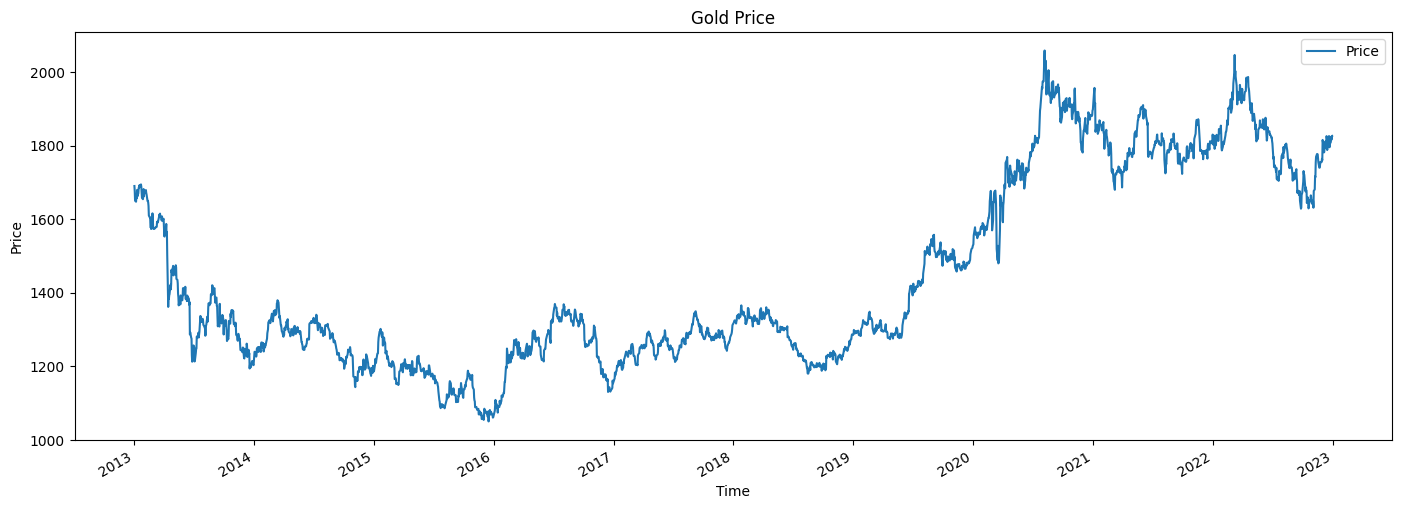

In [143]:
data.plot(figsize=(17,6))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Gold Price")

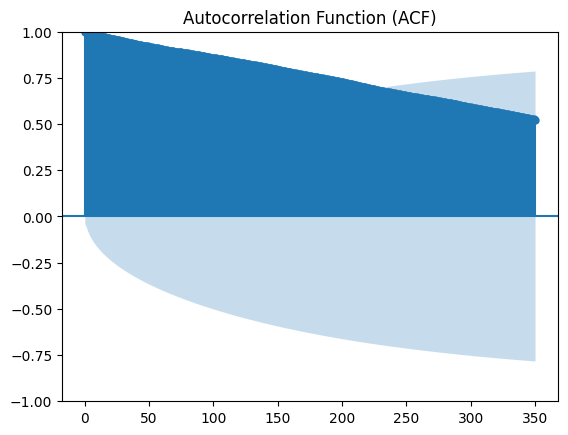

In [144]:
plot_acf(data, lags=350, title='Autocorrelation Function (ACF)')
plt.show()

([<matplotlib.lines.Line2D at 0x19d99ee7b20>],
 [<matplotlib.lines.Line2D at 0x19d93237fa0>])

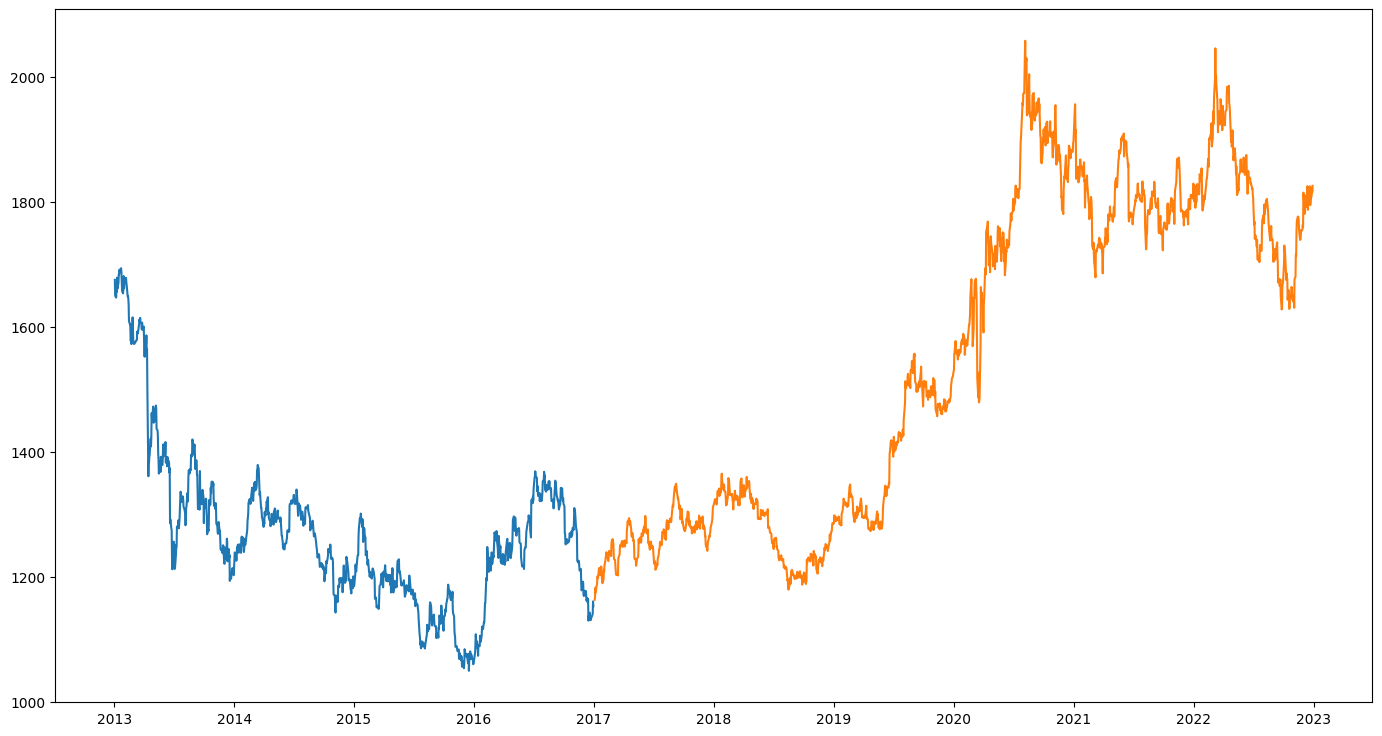

In [145]:
fig, axs = plt.subplots(figsize=(17, 9))
trend_1 = data.loc[ (data.index > "2013-01-02") & (data.index < "2017-01-01")]
trend_2 = data.loc[ (data.index > "2017-01-01") & (data.index < "2022-12-30")]
plt.plot(trend_1),plt.plot(trend_2)

<AxesSubplot:xlabel='Date'>

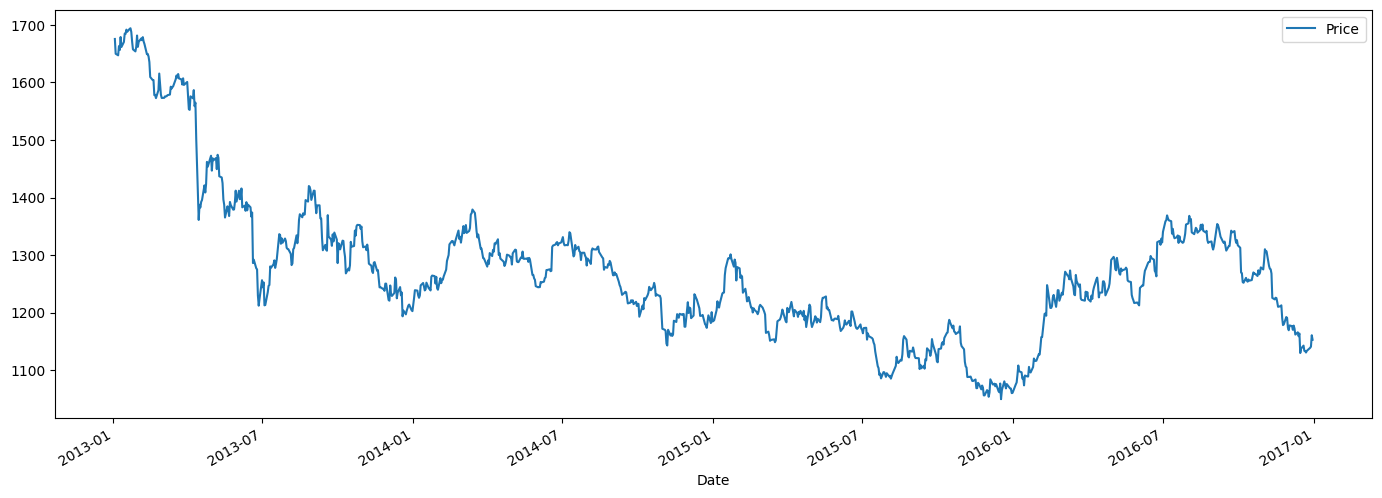

In [146]:
trend_1.plot(figsize=(17,6))

Components of Time Series Analysis:<p>
Trend: There is a slight downward trend between 2013-2017. And there is more powerfull upward trend after 2017.<p>
Seasonality: I see regular ups and downs and it might indicate seasonality with maybe period of 12.<p>
Cyclical: In which there is no fixed interval, uncertainty in movement and its pattern<p>
Irregularity: There are unexpected events and spikes in a short time span.<p>

### Stationarity:

Non-Stationary: Data seems non-stationary with changing mean-variance respect to time.<p>
Methods to check stationarity: Augmented Dickey-Fuller (ADF) Test or Unit Root Test and Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test test

##### ADF 

Null Hypothesis (H0): Series is non-stationary<p>
Alternate Hypothesis (HA): Series is stationary<p>
p-value >0.05 Fail to reject (H0)<p>
p-value <= 0.05 Accept (H1)

In [147]:
from statsmodels.tsa.stattools import adfuller, kpss
adf_result = adfuller(data["Price"])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'    {key}: {value}')

ADF Statistic: -0.9779171167137418
p-value: 0.7612330831178808
Critical Values:
    1%: -3.432892070219288
    5%: -2.86266308749922
    10%: -2.5673678605335093


As we can see p value is way higher than 0.05 so data is non-stationary

##### KPSS

In [148]:

kpss_result = kpss(data['Price'], regression='c')
print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print(f'    {key}: {value}')

KPSS Statistic: 5.515013579692899
p-value: 0.01
Critical Values:
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739


c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Reason for such high p-value. ADF analysis tests stationarity but kpss assumes its stationary and test this subject. so if you test it with adf and it is non- stationary there is no need for kpss analysis. Which it can be a bit misleading

### Converting non-Stationary to Stationary

There are multiple ways to turn data into stationary data.

##### Differencing

1-It basically differs next value from the previus one

p-value: 0.000


<AxesSubplot:xlabel='Date'>

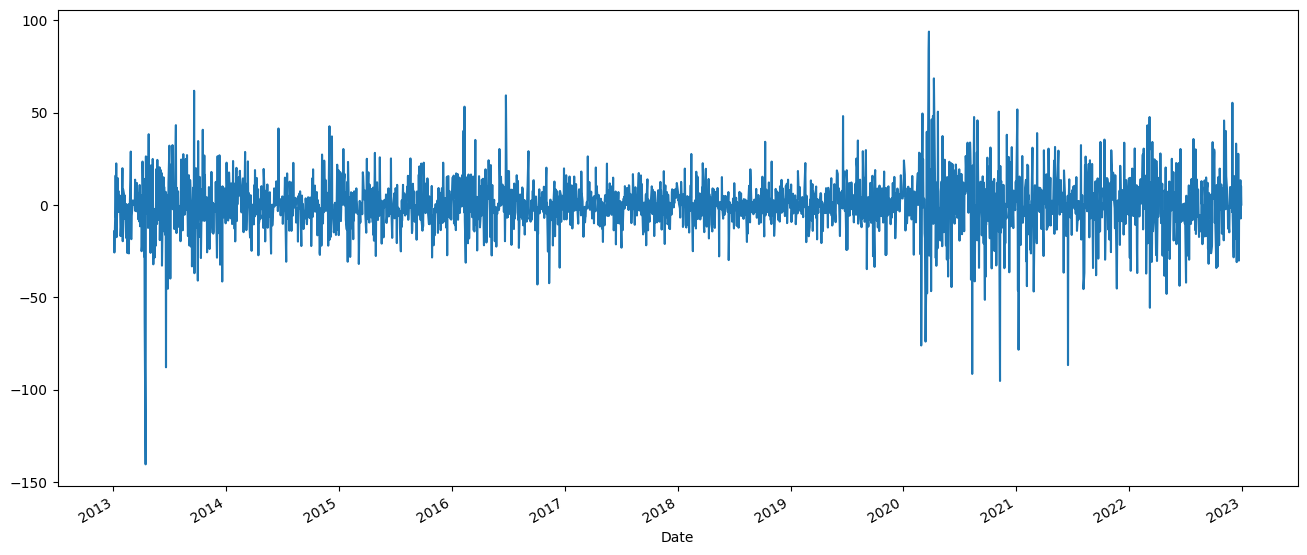

In [149]:
data['price_diff'] = data['Price'].diff()
data.dropna(inplace=True) #first diffs are ussually NaN

adf_result = adfuller(data['price_diff'])
print('p-value: {:.3f}'.format(adf_result[1]))

data["price_diff"].plot(figsize=(16,7))

##### Transformation

1-Be sure that your data doesn't contain negative or close to zero values<p>
2-It can be helpfull when variance is changing or with big values.<p>
3-Result; didn'T work well for this data

p-value: 0.694


<AxesSubplot:xlabel='Date'>

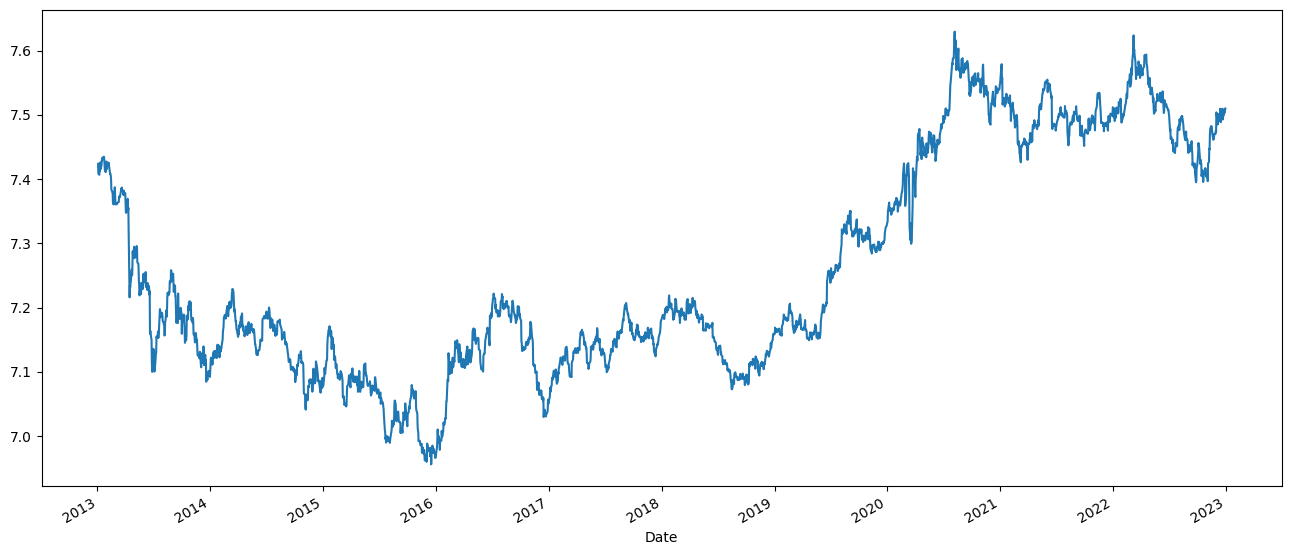

In [150]:
data['price_log'] = np.log(data['Price'])

adf_result = adfuller(data['price_log'])
print('p-value: {:.3f}'.format(adf_result[1]))

data["price_log"].plot(figsize=(16,7))

##### Difference + Transformation:

p-value: 0.694


c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Date'>

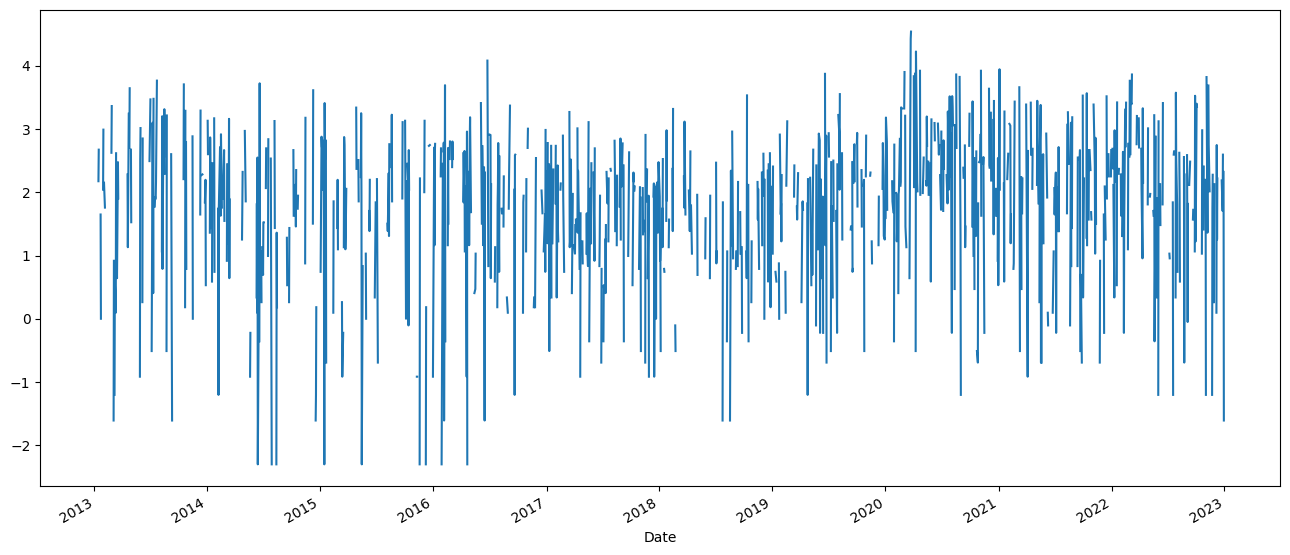

In [151]:
data['price_diff_log'] = np.log(data['price_diff'])

adf_result = adfuller(data['price_log'])
print('p-value: {:.3f}'.format(adf_result[1]))

data["price_diff_log"].plot(figsize=(16,7))

##### Simple Moving Avarage:

There wasn't a lot of difference with moving avarage

p-value: 0.737


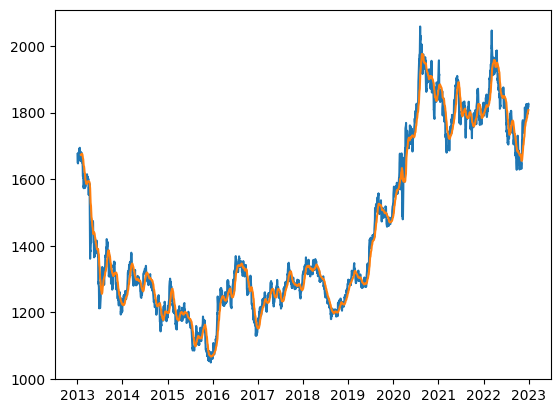

In [152]:
sma_window = 20
sma = data["Price"].rolling(window=sma_window).mean()

sma.dropna(inplace=True)
adf_result = adfuller(sma)
print('p-value: {:.3f}'.format(adf_result[1]))

plt.plot(data["Price"])
plt.plot(sma)

##### Diff + MA:

p-value: 0.000


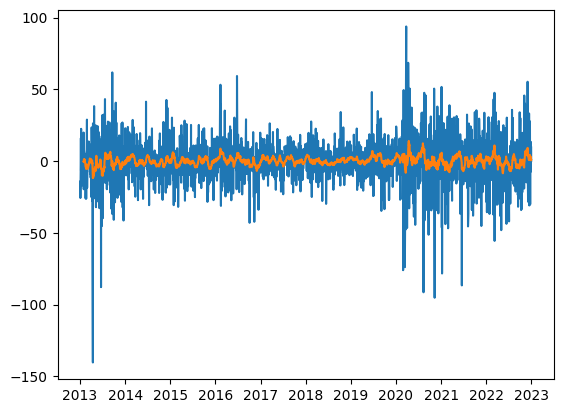

In [153]:
sma_window = 20
sma = data["price_diff"].rolling(window=sma_window).mean()

sma.dropna(inplace=True)
adf_result = adfuller(sma)
print('p-value: {:.3f}'.format(adf_result[1]))

plt.plot(data["price_diff"])
plt.plot(sma)

##### Cumulative Moving Avarage(CMA):

1-ı've got much better result with cumulative moving avarage.<p>
2-CMA provides a simple average of all past data

p-value: 0.005


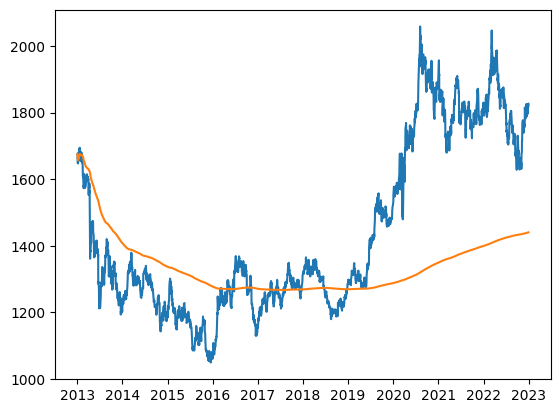

In [115]:
cma = data["Price"].expanding().mean()

adf_result = adfuller(cma)
print('p-value: {:.3f}'.format(adf_result[1]))

plt.plot(data["Price"])
plt.plot(cma)

##### Exponential Moving Average (EMA)

1-alpha based on how much weight you want to give recent observations (lower alpha gives more weight to recent data).<p>
2-EMA is more responsive to recent changes than cma.

p-value: 0.738


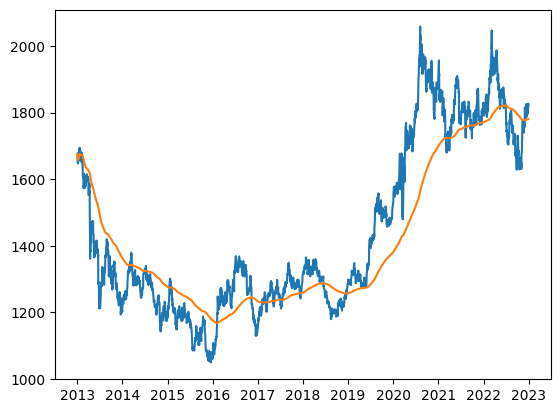

In [116]:
ema = data["Price"].ewm(alpha=0.005).mean()

adf_result = adfuller(ema)
print('p-value: {:.3f}'.format(adf_result[1]))

plt.plot(data["Price"])
plt.plot(ema)

##### Summary:

I believe because there is 2 different trend and mean of data is also changing moving avarage, CMA and EMA didn't change the datas stationarity the way ı liked. So best method for this data is differnecing to make it stationary.<p>
If the datas mean was more stable with changing variance moving avarge methods would be more usefull.

<AxesSubplot:xlabel='Date'>

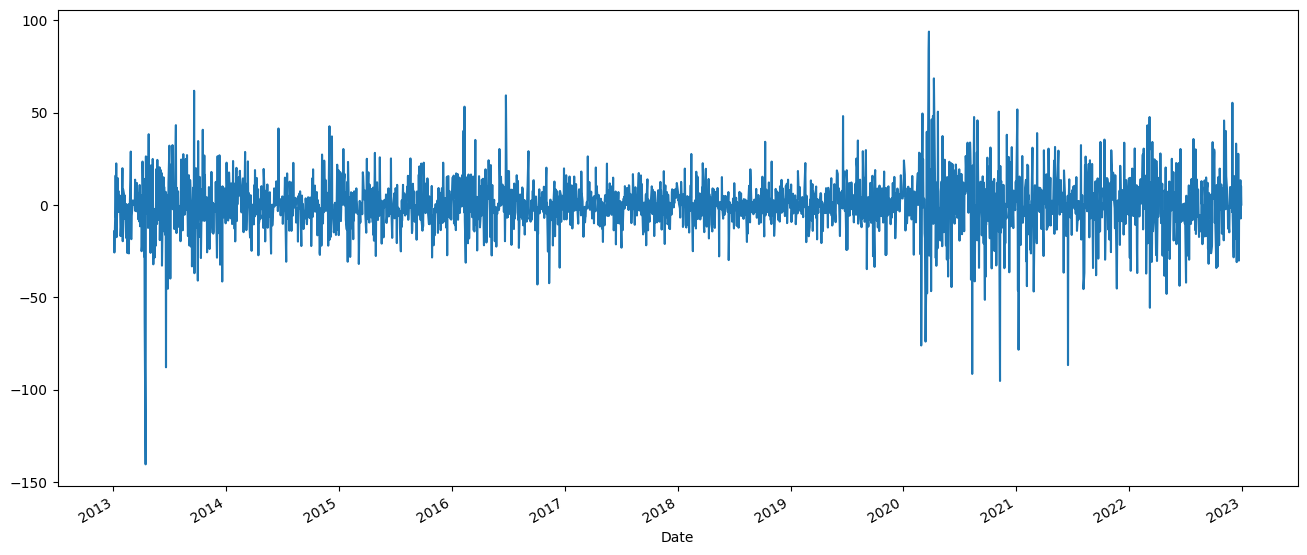

In [117]:
data = data["price_diff"]
data.plot(figsize=(16,7))

### Seasonality

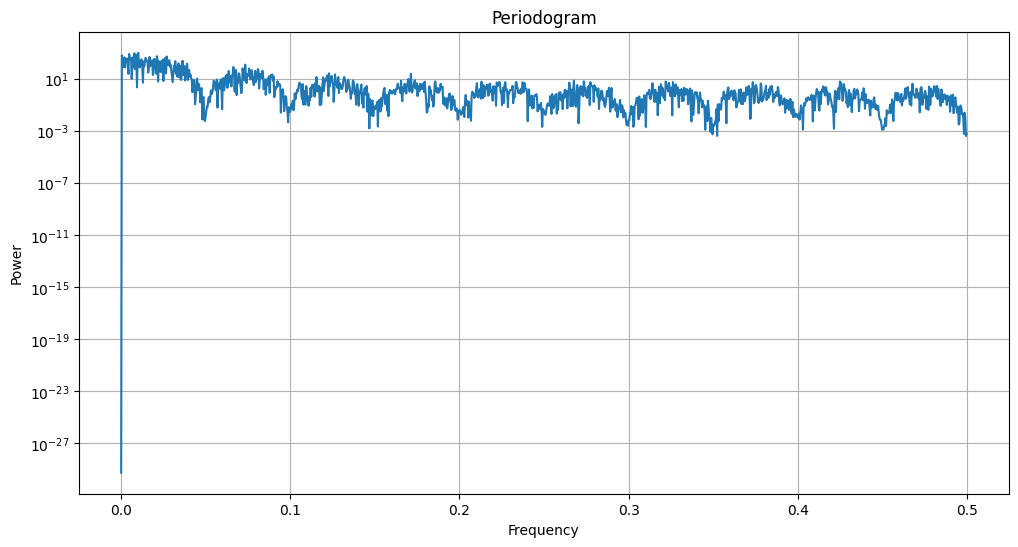

In [155]:
frequencies, power = periodogram(sma)
plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, power)
plt.title('Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid()
plt.show()

### Forecasting

##### ACF and PACF

Autocorrelation Function (ACF)<p>
Definition: The Autocorrelation Function (ACF) measures the correlation between a time series and its lagged values.<p>
Purpose: ACF is used to identify patterns or dependencies within the time series data. It helps in understanding how each observation in the series is related to previous observations at different lag intervals.

Partial Autocorrelation Function (PACF)<p>
Definition: The Partial Autocorrelation Function (PACF) measures the correlation between a time series and its lagged values, after removing the effect of shorter lagged values.<p>
Purpose: PACF helps in identifying the direct relationship between points separated by a particular lag, without the influence of intermediate time points.

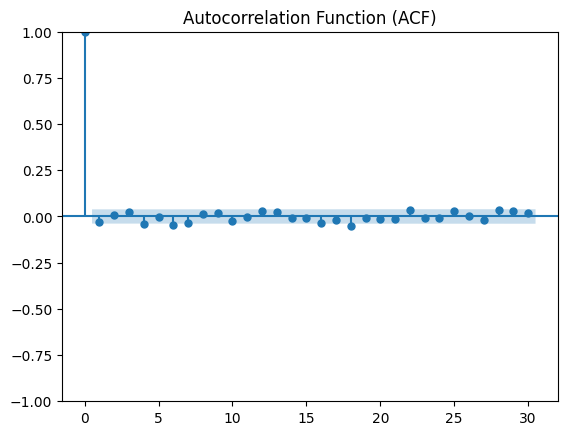

c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


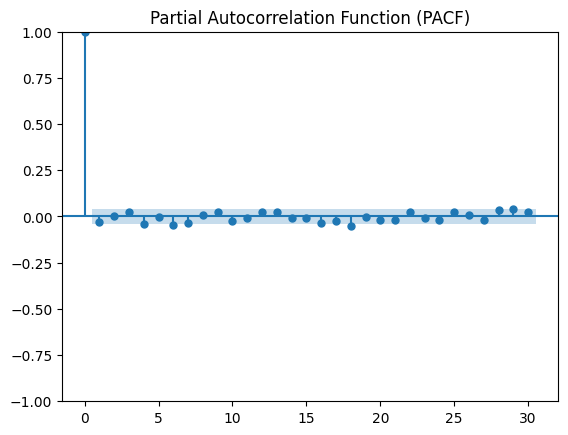

In [119]:
plot_acf(data, lags=30, title='Autocorrelation Function (ACF)')
plt.show()
plot_pacf(data, lags=30, title='Partial Autocorrelation Function (PACF)')
plt.show()

##### AIC ve BIC 

AIC and BIC are important information criteria used in statistical model selection. Lower AIC or BIC values indicate better model fit and favor simpler models. These criteria provide an objective method for model selection and can be used to compare different models effectively.<p>
After you build a model search for AIC and BIC values. Lower these values means better fit as model

##### ARIMA Model

AR ==> Uses past values to predict the future.<p>
MA ==> Uses past error terms in the given series to predict the future.<p>
I==> Uses the differencing of observation and makes the stationary data.<p>

p==> log order => No of lag observations.<p>
d==> degree of differencing => No of times that the raw observations are differenced.<p>
q==>order of moving average => the size of the moving average window<p>
EX: order=(1,0,1): lag order 1,degree of differencing 0,ma order 1 means depends on only last values error 

In [120]:
from pmdarima.arima import auto_arima
    
auto_arima(y=data,
           seasonal=False,
           trace=True #so that you can see what is happening.
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=21182.101, Time=1.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21188.759, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=21188.052, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21188.084, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=21189.254, Time=0.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=21191.897, Time=0.45 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=21191.157, Time=1.00 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=21191.361, Time=0.89 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21190.036, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=21189.026, Time=0.73 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=21188.989, Time=0.71 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=21183.196, Time=2.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21184.352, Time=2.94 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 11.400 seconds


ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [121]:
model = sm.tsa.arima.ARIMA(data, order=(2, 0, 2))
model_fit = model.fit()

AIC = model_fit.aic
BIC = model_fit.bic
print(f"AIC: {AIC}")
print(f"BIC: {BIC}")

print(model_fit.summary())

c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: 21184.10298271964
BIC: 21219.24090014808
                               SARIMAX Results                                
Dep. Variable:             price_diff   No. Observations:                 2582
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -10586.051
Date:                Wed, 26 Jun 2024   AIC                          21184.103
Time:                        13:14:27   BIC                          21219.241
Sample:                             0   HQIC                         21196.839
                               - 2582                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.291      0.019      0.985      -0.564       0.575
ar.L1         -1.2279      0.015    -83.049      0.000      -1.257      -1.199
ar.L2 

c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


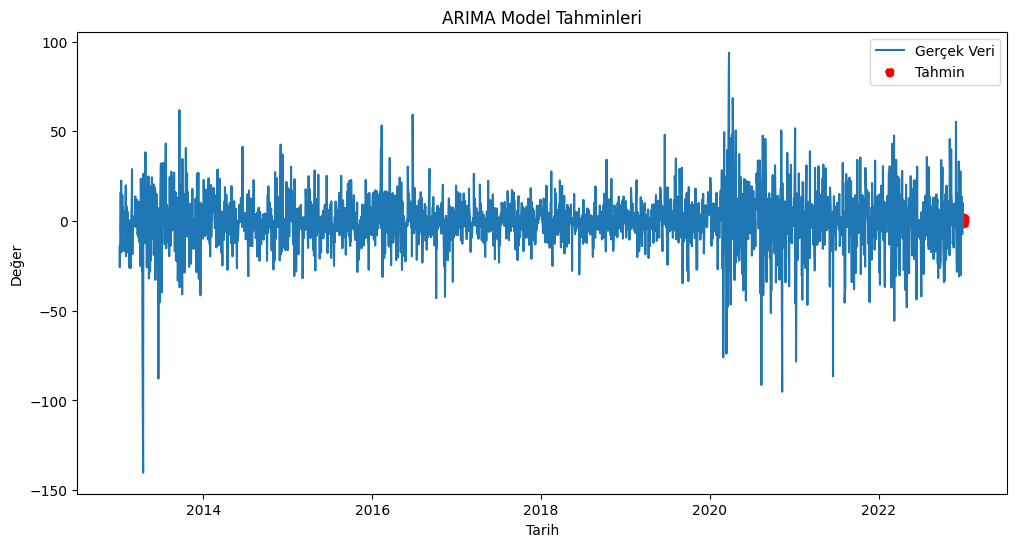

In [122]:
forecast = model_fit.forecast(steps=10)
forecast_index = pd.date_range(start=data.index[-1], periods=len(forecast)+1, freq='D')[1:]

plt.figure(figsize=(12, 6))
plt.plot(data, label='Gerçek Veri')
plt.scatter(forecast_index,forecast, label='Tahmin', linestyle='--', color='red')
plt.title('ARIMA Model Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Değer')
plt.legend()
plt.show()

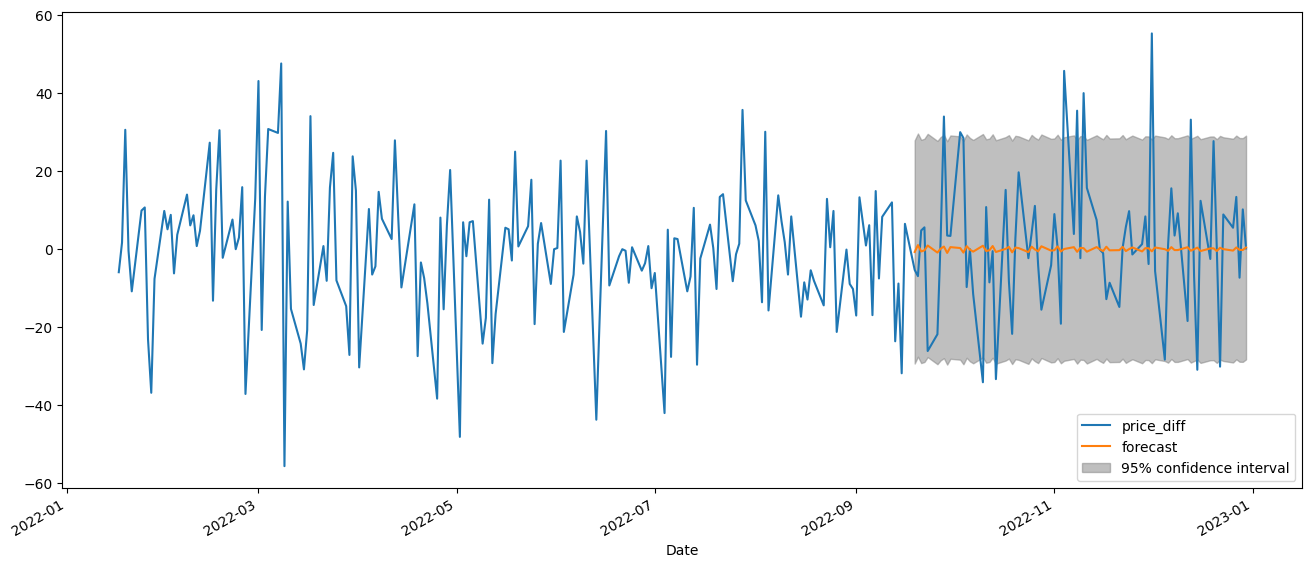

In [123]:
fig,ax = plt.subplots()
ax = data.loc[(data.index > "2022-01-15")].plot(figsize=(16,7))
plot_predict(model_fit,'2022-09-19', '2022-12-30', dynamic=True, ax=ax)
plt.show()